In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast

root_path = Path(r"/home/hblanc01/Data/fake_cells_16bit_example/sim_acquisition_spotmapD_grid_1")
f1_sweep_path = root_path / "decode_params_results_spotmapD_grid_1.json"
with open(f1_sweep_path) as f:
    f1_sweep = json.load(f)


In [44]:
tidy_f1_sweep = {i:ast.literal_eval(key)|value for i, (key,value) in enumerate(list(f1_sweep.items()))}
df_f1_sweep = pd.DataFrame.from_dict(tidy_f1_sweep, orient="index")
df_f1_sweep

fdr  min_pixels  mag_thresh  spotiflow_threshold  F1 Score  Precision  \
0   0.05           9         0.7                  0.1     0.845      0.942   
1   0.05           9         0.8                  0.1     0.850      0.954   
2   0.05           9         0.9                  0.1     0.862      0.971   
3   0.05           9         1.0                  0.1     0.859      0.979   
4   0.05           9         1.1                  0.1     0.865      0.987   
..   ...         ...         ...                  ...       ...        ...   
86  0.05           9         1.5                  0.4     0.603      1.000   
87  0.05           9         1.6                  0.4     0.422      1.000   
88  0.05           9         1.7                  0.4     0.210      1.000   
89  0.05           9         1.8                  0.4     0.071      1.000   
90  0.05           9         1.9                  0.4     0.013      0.333   

    Recall  True Positives  False Positives  False Negatives  
0    0.766             229               14               70  
1    0.766             229               11               70  
2    0.776             232                7               67  
3    0.766             229                5               70  
4    0.769             230                3               69  
..     ...             ...              ...              ...  
86   0.431             129                0              170  
87   0.268              80                0              219  
88   0.117              35                0              264  
89   0.037              11                0              288  
90   0.007               2                4              297  

[91 rows x 10 columns]

In [77]:
root_path.stem.split('sim_acquisition_')[1]

'spotiflow_synth_3D_grid_1'

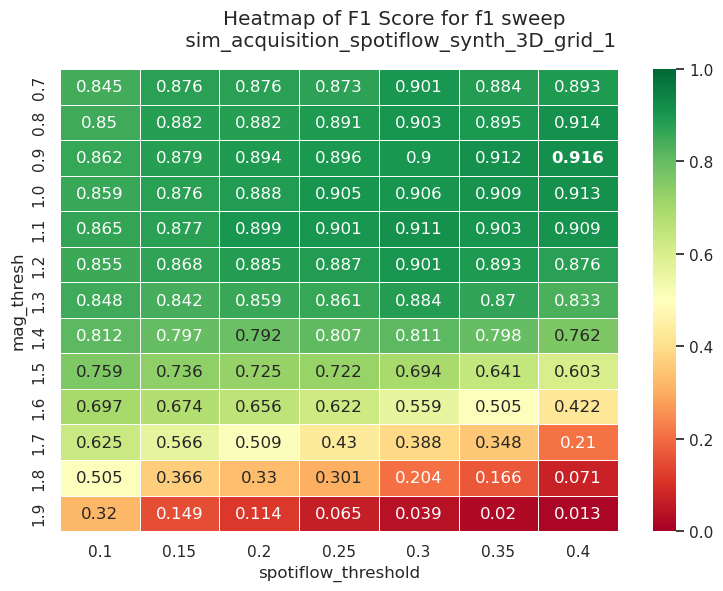

In [ ]:
sns.set_theme()
metric = "F1 Score"
metric_heatmap = (
    df_f1_sweep
    .pivot(index="mag_thresh", columns="spotmaphold", values=metric)
)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
max_val = metric_heatmap.max().max()
sns.heatmap(metric_heatmap,mask=metric_heatmap == max_val, annot=True, fmt="n", linewidths=.5, ax=ax, vmin=0, vmax=1, cmap="RdYlGn")
sns.heatmap(metric_heatmap, mask=metric_heatmap != max_val, annot=True, fmt="n", annot_kws={"weight":'bold'}, linewidths=.5, ax=ax, vmin=0, vmax=1, cmap="RdYlGn", cbar=False)
fig_name = f"Heatmap of {metric} for f1 sweep \n {root_path.stem}" #.split('sim_acquisition_')[1]
f.suptitle(fig_name)
f.savefig(root_path / f"{fig_name}.png")

In [ ]:
max_mask

np.float64(0.916)

In [26]:
print(next(iter(f1_sweep)))
print(f1_sweep[next(iter(f1_sweep))])

{'fdr': 0.05, 'min_pixels': 9, 'mag_thresh': 0.7, 'spotiflow_threshold': 0.1}
{'F1 Score': 0.845, 'Precision': 0.942, 'Recall': 0.766, 'True Positives': 229, 'False Positives': 14, 'False Negatives': 70}


In [22]:
t = next(iter(f1_sweep))
t

"{'fdr': 0.05, 'min_pixels': 9, 'mag_thresh': 0.7, 'spotiflow_threshold': 0.1}"

In [27]:
ast.literal_eval(t) | f1_sweep[next(iter(f1_sweep))]

{'fdr': 0.05,
 'min_pixels': 9,
 'mag_thresh': 0.7,
 'spotiflow_threshold': 0.1,
 'F1 Score': 0.845,
 'Precision': 0.942,
 'Recall': 0.766,
 'True Positives': 229,
 'False Positives': 14,
 'False Negatives': 70}